In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=6,
    n_informative=4,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42,
)
df = pd.DataFrame(X, columns=[f"f{i}" for i in range(X.shape[1])])
df["target"] = y
df.head()

,f0,f1,f2,f3,f4,f5,target
0,1.398530,-0.751032,1.596850,-2.697981,-2.003422,-1.174463,0
1,0.004500,-1.156470,-0.242629,-0.949384,0.855995,-0.530248,0
2,-0.045547,-1.387620,-0.645425,-0.436629,-1.113651,-1.246542,0
3,0.377235,0.671426,-0.541729,1.305696,-0.758998,0.121137,1
4,0.551953,-2.282357,0.342796,1.550468,0.200936,-2.523029,1


In [3]:
X_train, X_val, y_train, y_val = train_test_split(
    df.drop(columns="target"), df["target"], test_size=0.25, random_state=42, stratify=df["target"]
)

# Standardize + logistic regression
log_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, solver="lbfgs")
)
log_reg.fit(X_train, y_train)

y_val_pred = log_reg.predict(X_val)
y_val_proba = log_reg.predict_proba(X_val)[:, 1]

acc = accuracy_score(y_val, y_val_pred)
roc = roc_auc_score(y_val, y_val_proba)
print(f"Accuracy: {acc:.3f}  |  ROC-AUC: {roc:.3f}")

Accuracy: 0.924  |  ROC-AUC: 0.957


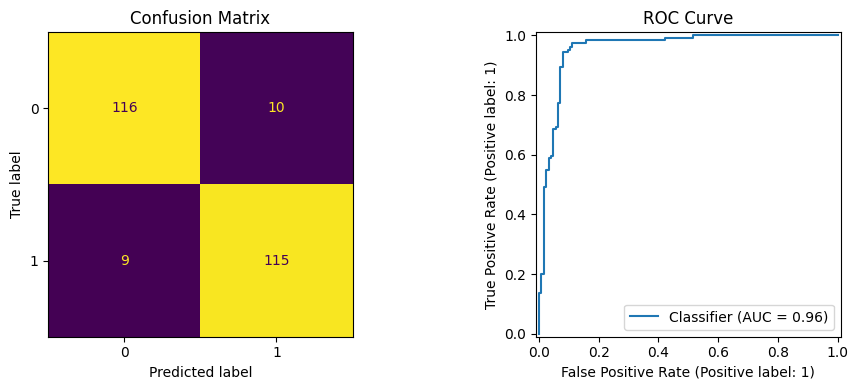

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, ax=ax[0], colorbar=False)
ax[0].set_title("Confusion Matrix")

RocCurveDisplay.from_predictions(y_val, y_val_proba, ax=ax[1])
ax[1].set_title("ROC Curve")

plt.tight_layout()
plt.show()

In [5]:
new_points = pd.DataFrame(
    [[0.5, -1.0, 0.3, 1.2, -0.7, 0.1],
     [-1.2, 0.8, -0.5, -0.9, 0.6, -0.2]],
    columns=[f"f{i}" for i in range(X.shape[1])]
)
proba = log_reg.predict_proba(new_points)[:, 1]
pd.DataFrame({"probability_class_1": proba})

,probability_class_1
0,0.912339
1,0.152184
